# Team Miss Meteo

## Idéas/ A faire

hello

## Résumé

- Traitement Données
- Visualisation
- ACP
- K-Means

## Variables
- insee 	Informe sur la localisation de la station :
- Numéro 	Station
    - 06088001 	Nice
    - 31069001 	Toulouse Blagnac
    - 33281001 	Bordeaux-Mérignac
    - 35281001 	Rennes
    - 59343001 	Lille Lesquin
    - 67124001 	Strasbourg Entzheim
    - 75114001 	Paris-Montsouris
- tH2_obs 	Observation de la température à 2 mètres in situ- au point station (prédictant)
- ech 	Echéance de validité
- capeinsSOL0 	Energie potentielle convective
- ciwcH20 	Fraction de glace nuageuse à 20 mètres
- clwcH20 	Fraction d'eau nuageuse à 20 mètres
- nH20 	Fraction nuageuse à 20 mètres
- pMER0 	Pression au niveau de la mer
- rr1SOL0 	Précipitation horaire au niveau du sol
- rrH20 	Précipitation horaire à 20 mètres
- tpwHPA850 	Température potentielle au niveau 850 hPa
- ux1H10 	Rafale 1 minute du vent à 10 mètres composante zonale
- vapcSOL0 	Colonne de vapeur d'eau
- vx1H10 	Rafale 1 minute du vent à 10 mètres composante verticale
- ddH10_rose4 	Direction du vent à 10 mètres en rose4
- ffH10 	Force du vent à 10 mètres en m/s
- flir1SOL0 	Flux Infra-rouge en J/m2
- fllat1SOL0 	Flux de chaleur latente en J/m2
- flsen1SOL0 	Flux de chaleur sensible en J/m2
- flvis1SOL0 	Flux visible en J/m2
- hcoulimSOL0 	Hauteur de la couche limite en mètres
- huH2 	Humidité 2mètres en %
- iwcSOL0 	Réservoir neige kg/m2 (équivalent en eau liquide des chutes de neige)
- nbSOL0_HMoy 	Nébulosité basse (moyenne sur les 6 points de grille autour de la station) (fraction en octat du ciel occulté)
- ntSOL0_HMoy 	Nébulosité totale (moyenne sur les 6 points de grille autour de la station)
- tH2 	Température à 2 mètres du modèle AROME
- tH2_VGrad_2.100 	Gradient vertical de température entre 2 mètres et 100 mètres
- tH2_XGrad 	Gradient zonal de température à 2 mètres
- tH2_YGrad 	Gradient méridien de température à 2 mètres
- mois 	Le mois

## Data analysis

In [3]:
path="./../data_meteo/"
meteo=read.table(paste(path,"train_1.csv",sep=""),sep=";",header=T,dec=",")
# Vérification du contenu
nrow(meteo); ncol(meteo)
summary(meteo)

[1] 6167

[1] 31

         date          insee             tH2_obs       capeinsSOL0      
 2014-01-01:   7   Min.   : 6088001   Min.   :-6.10   Min.   :   0.000  
 2014-01-02:   7   1st Qu.:31069001   1st Qu.: 6.70   1st Qu.:   0.000  
 2014-01-03:   7   Median :35281001   Median :10.50   Median :   1.029  
 2014-01-04:   7   Mean   :43900001   Mean   :10.71   Mean   :  37.366  
 2014-01-05:   7   3rd Qu.:67124001   3rd Qu.:14.50   3rd Qu.:  20.049  
 2014-01-06:   7   Max.   :75114001   Max.   :29.80   Max.   :1083.809  
 (Other)   :6125                                      NA's   :581       
    ciwcH20           clwcH20        ddH10_rose4     ffH10         
 Min.   :0.0e+00   Min.   :0.00000      : 126    Min.   : 0.00823  
 1st Qu.:0.0e+00   1st Qu.:0.00000   1.0:1274    1st Qu.: 1.73647  
 Median :0.0e+00   Median :0.00000   2.0: 831    Median : 2.59133  
 Mean   :0.0e+00   Mean   :0.00001   3.0:1892    Mean   : 3.02133  
 3rd Qu.:0.0e+00   3rd Qu.:0.00000   4.0:2044    3rd Qu.: 3.80775  
 Max.   

**Que faire avec "date" ?**

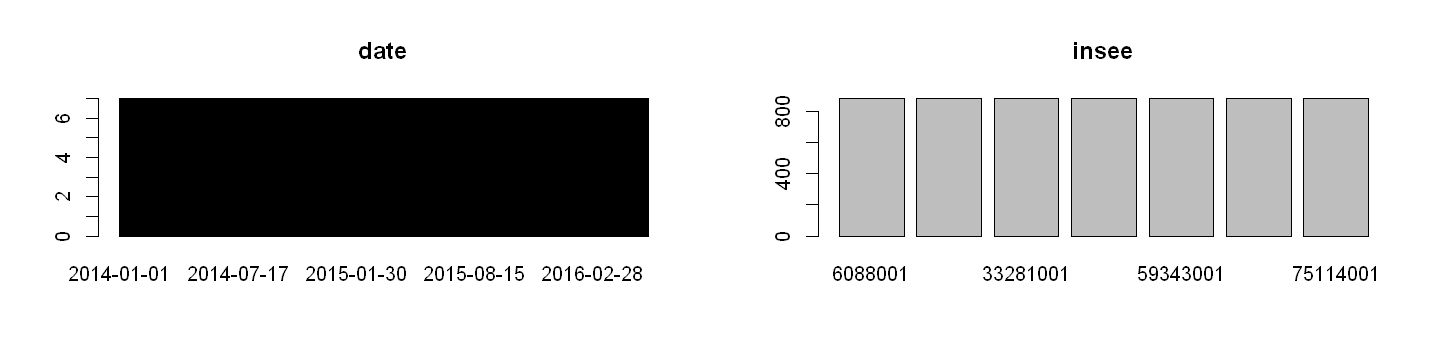

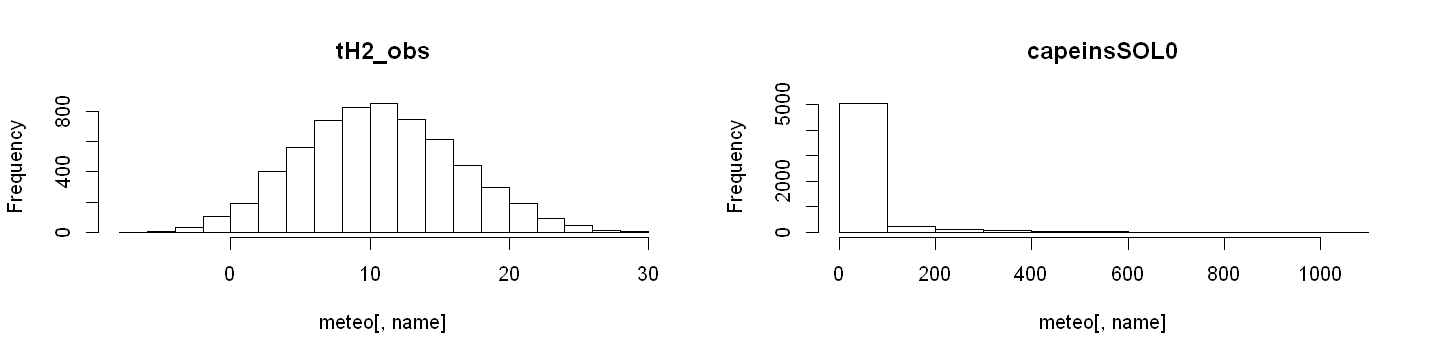

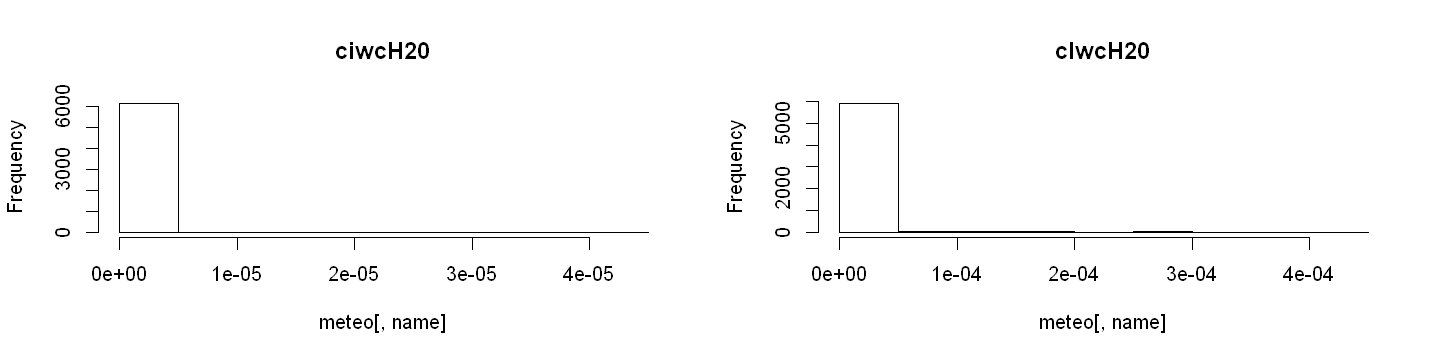

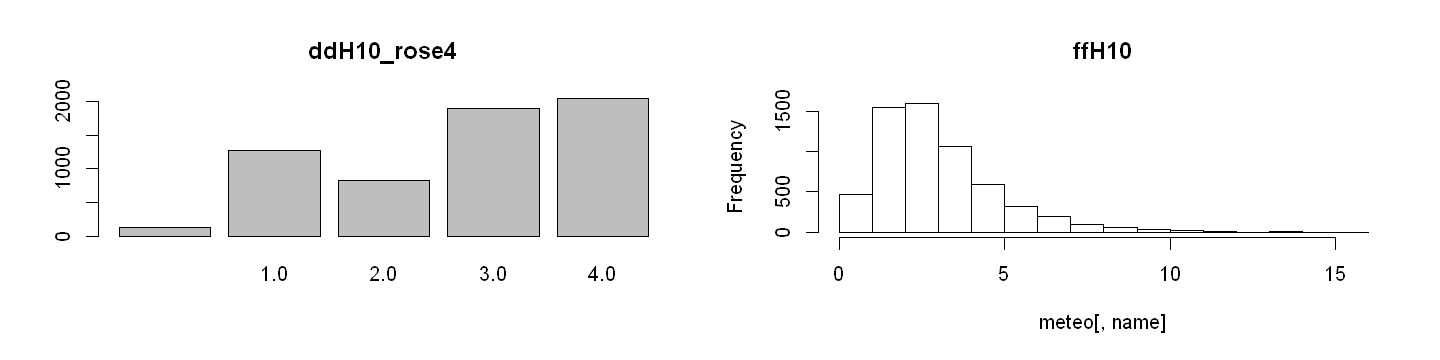

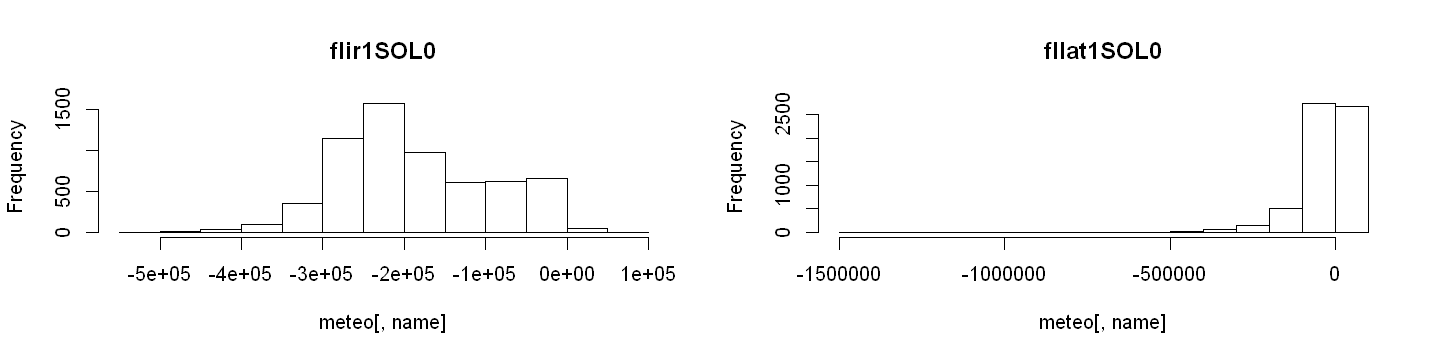

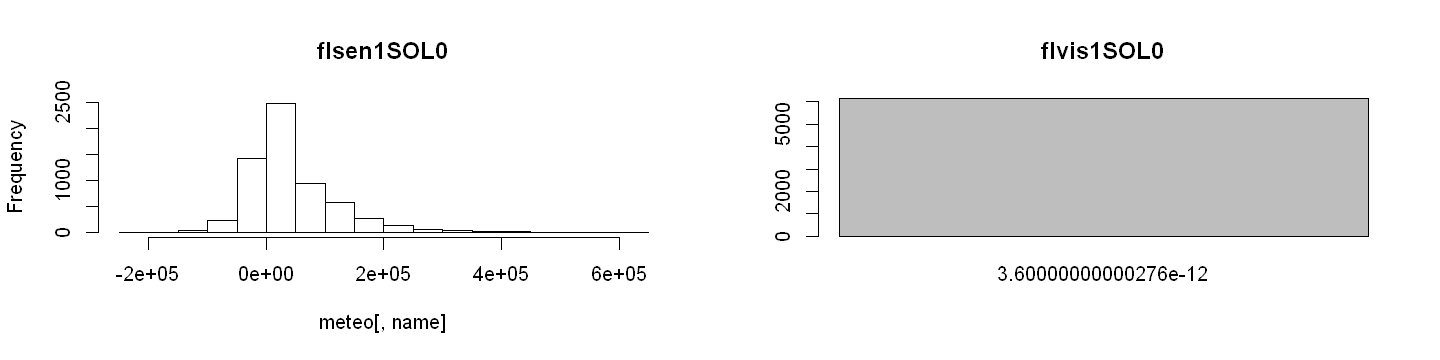

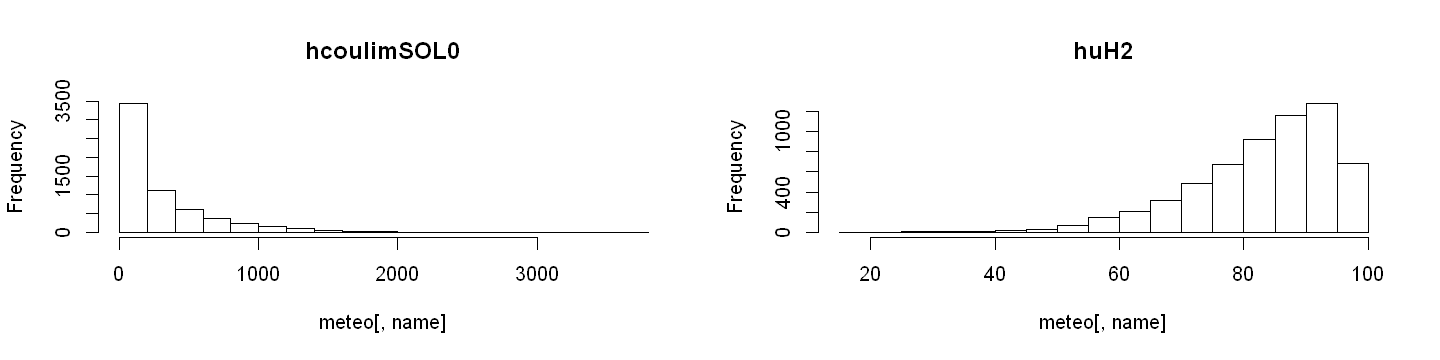

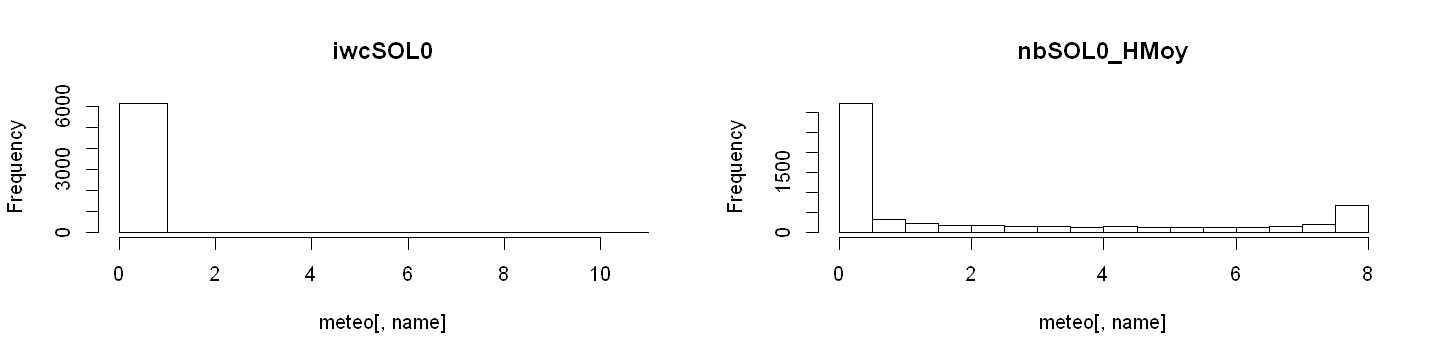

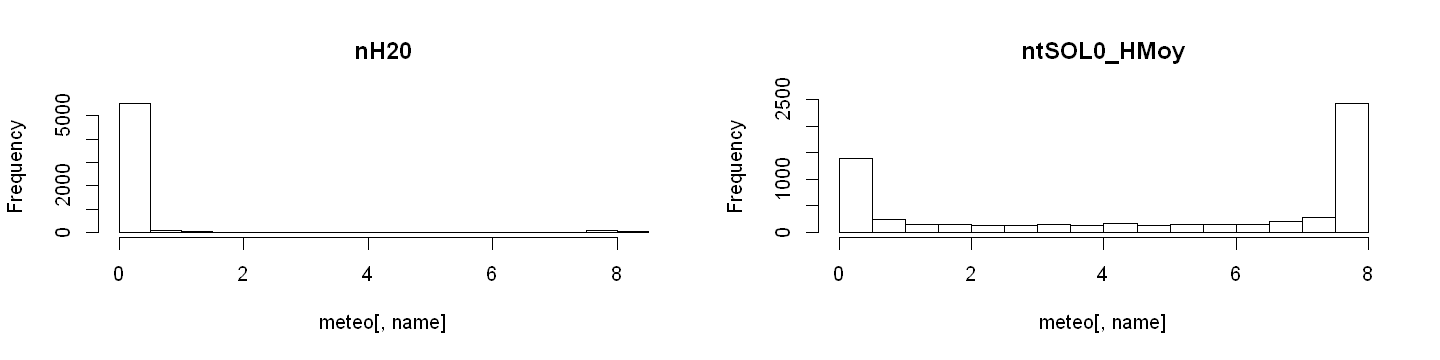

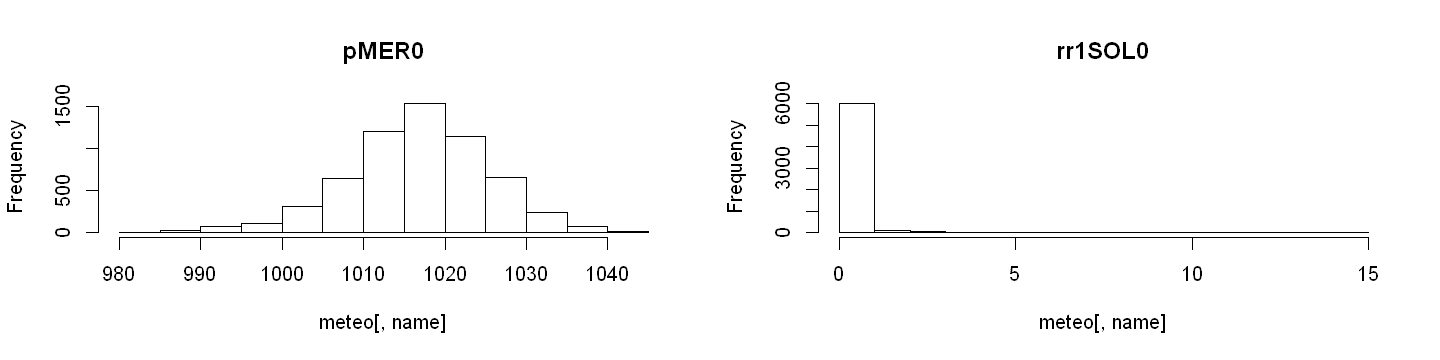

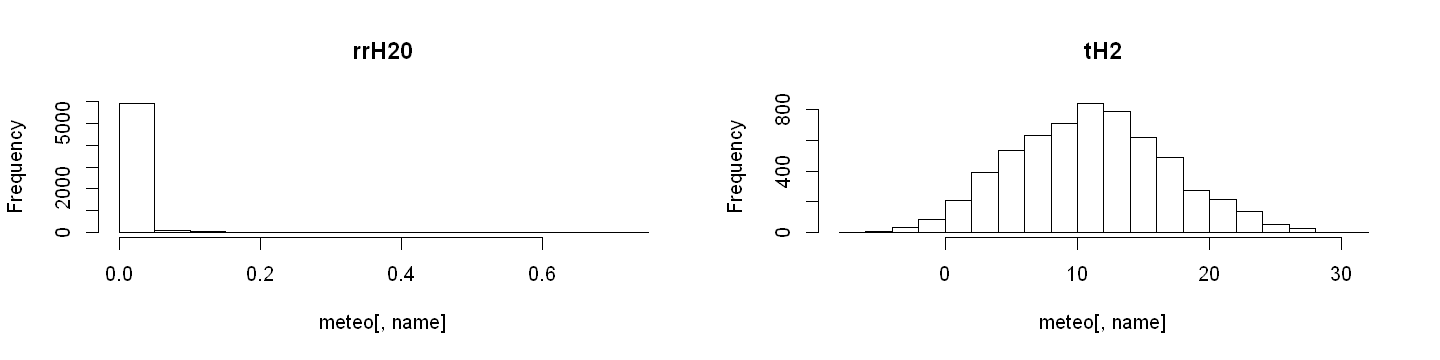

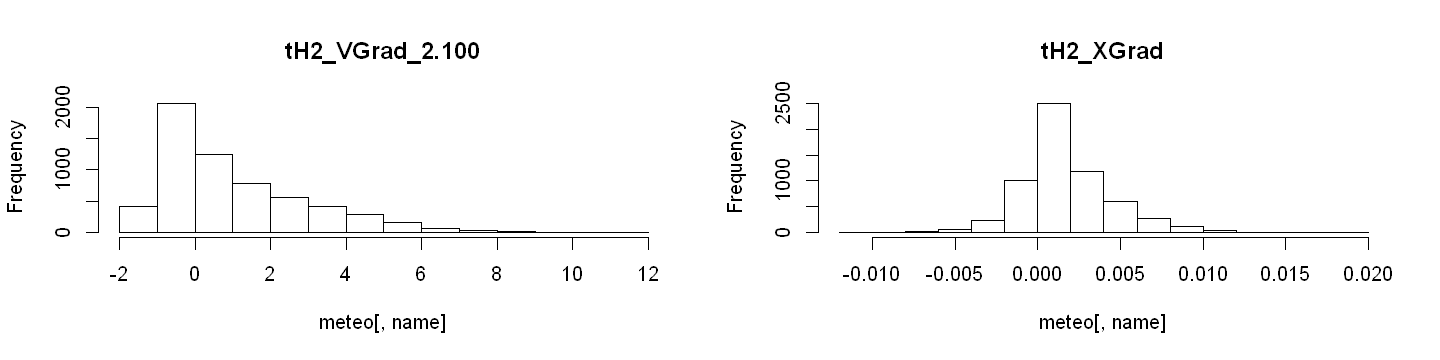

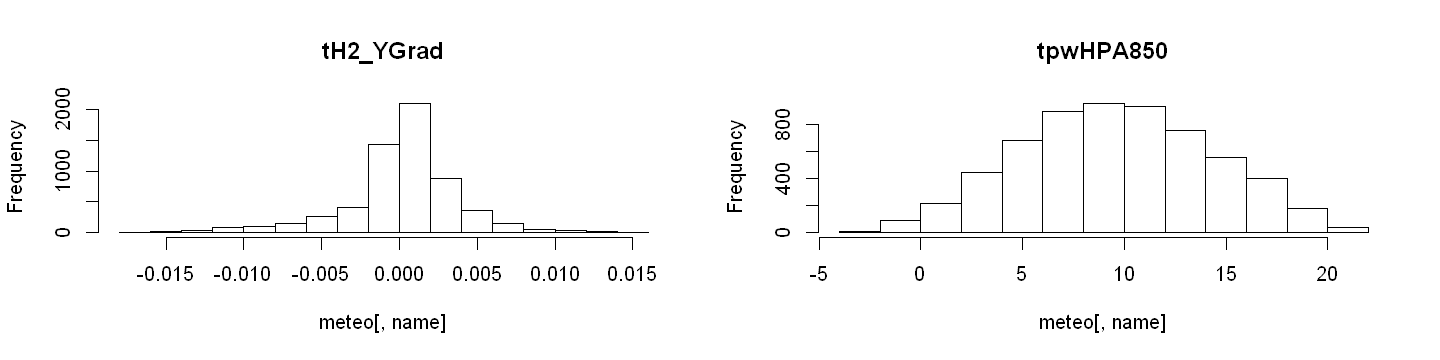

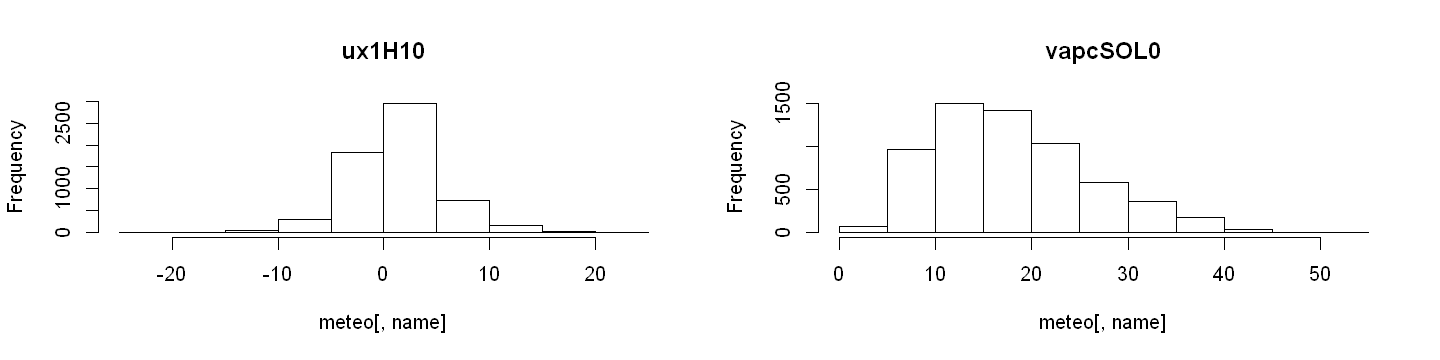

ERROR: Error in `[.data.frame`(meteo, , ddH10_rose4): object 'ddH10_rose4' not found


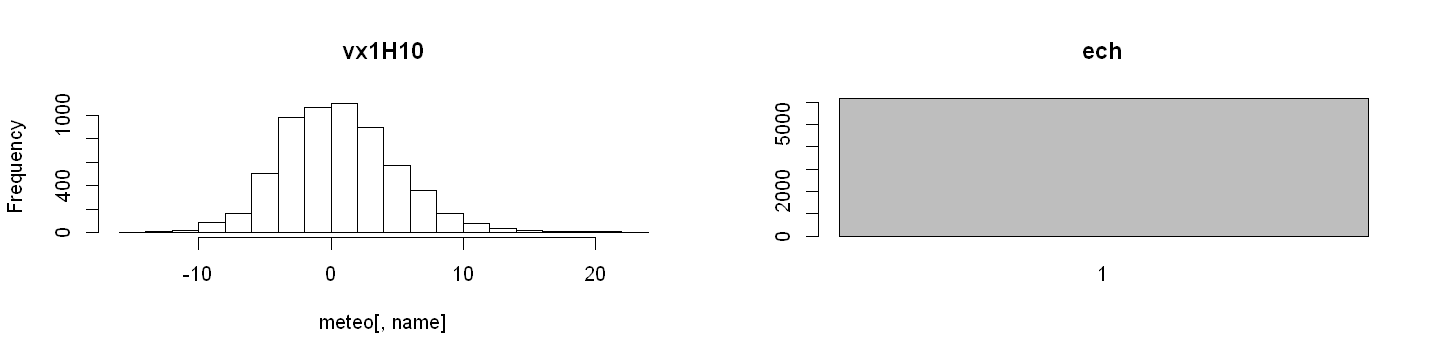

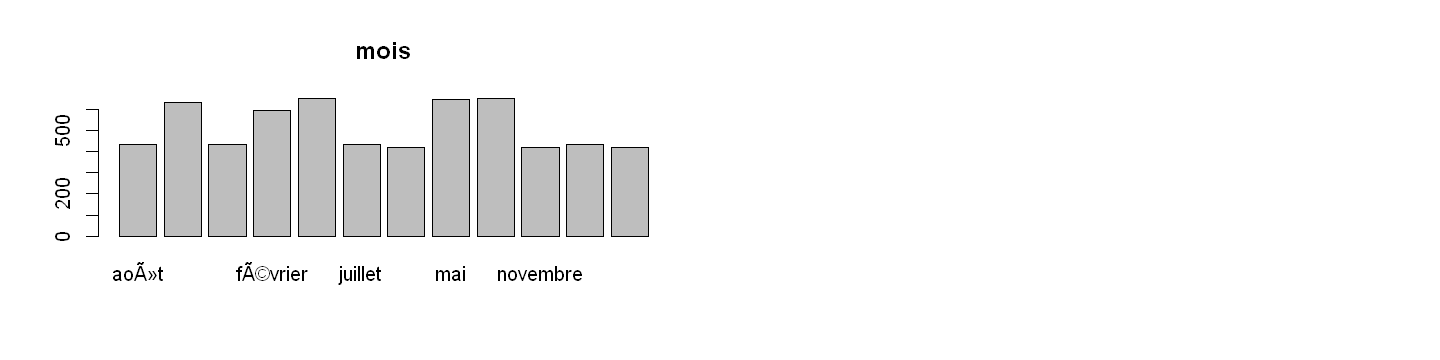

In [22]:
par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=3)

# quanti to factor
meteo$insee<-as.factor(meteo$insee)
meteo$mois<-as.factor(meteo$mois)
meteo$ddH10_rose4<-as.factor(meteo$ddH10_rose4)
meteo$ech<-as.factor(meteo$ech)
meteo$flvis1SOL0<-as.factor(meteo$flvis1SOL0)



for (name in colnames(meteo)) {
if (class(meteo[,name])=='factor') {barplot(table(meteo[,name]),main=name)} else 
    {
        hist(meteo[,name],main=name)
    }
}

table(meteo[,ddH10_rose4])

** Quelles variables ajustées pour les rendre plus gaussiennes?**

In [7]:
summary(meteo)

         date          insee             tH2_obs       capeinsSOL0      
 2014-01-01:   7   Min.   : 6088001   Min.   :-6.10   Min.   :   0.000  
 2014-01-02:   7   1st Qu.:31069001   1st Qu.: 6.70   1st Qu.:   0.000  
 2014-01-03:   7   Median :35281001   Median :10.50   Median :   1.029  
 2014-01-04:   7   Mean   :43900001   Mean   :10.71   Mean   :  37.366  
 2014-01-05:   7   3rd Qu.:67124001   3rd Qu.:14.50   3rd Qu.:  20.049  
 2014-01-06:   7   Max.   :75114001   Max.   :29.80   Max.   :1083.809  
 (Other)   :6125                                      NA's   :581       
    ciwcH20           clwcH20         ddH10_rose4        ffH10         
 Min.   :0.0e+00   Min.   :0.00000   Min.   :1.000   Min.   : 0.00823  
 1st Qu.:0.0e+00   1st Qu.:0.00000   1st Qu.:2.000   1st Qu.: 1.73647  
 Median :0.0e+00   Median :0.00000   Median :3.000   Median : 2.59133  
 Mean   :0.0e+00   Mean   :0.00001   Mean   :2.779   Mean   : 3.02133  
 3rd Qu.:0.0e+00   3rd Qu.:0.00000   3rd Qu.:4.000   3rd

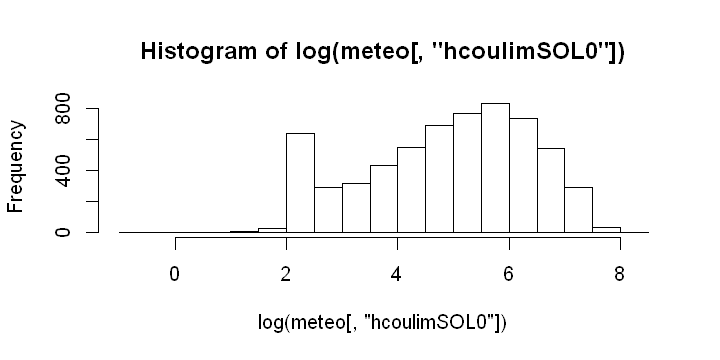

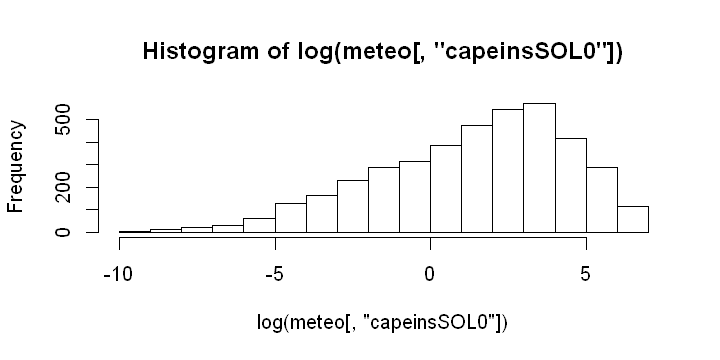

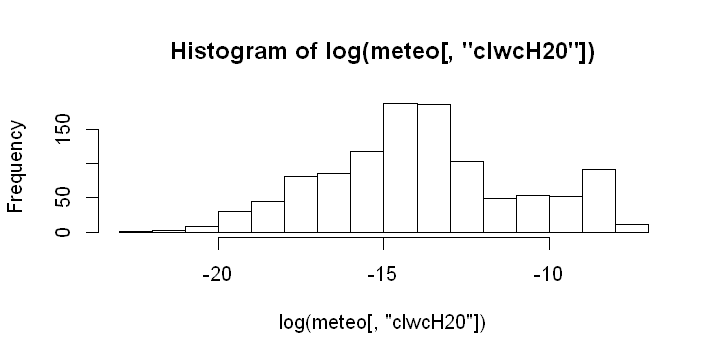

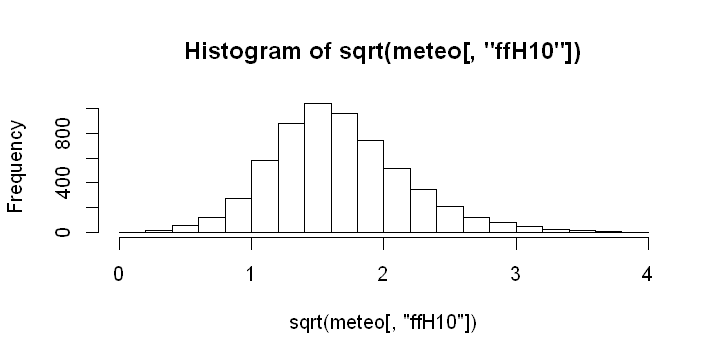

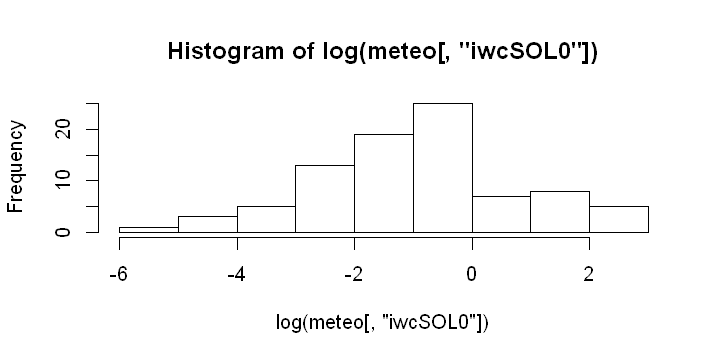

In [8]:
hist(log(meteo[,'hcoulimSOL0']))
hist(log(meteo[,'capeinsSOL0']))
hist(log(meteo[,'clwcH20']))
hist(sqrt(meteo[,'ffH10']))
hist(log(meteo[,'iwcSOL0']))
#hist(sqrt(meteo[,'tH2_VGrad_2.100']))

In [9]:
# if needed to rescale
#meteo=scale(meteo[,c(3:29)])

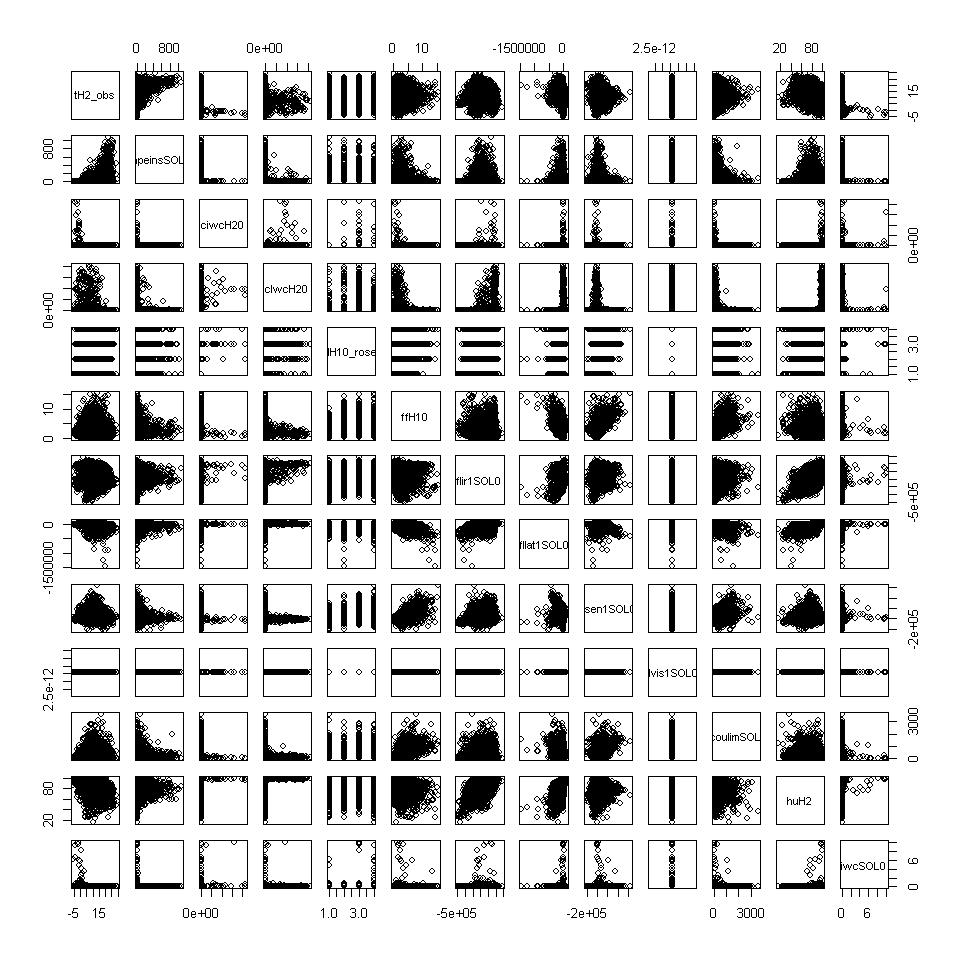

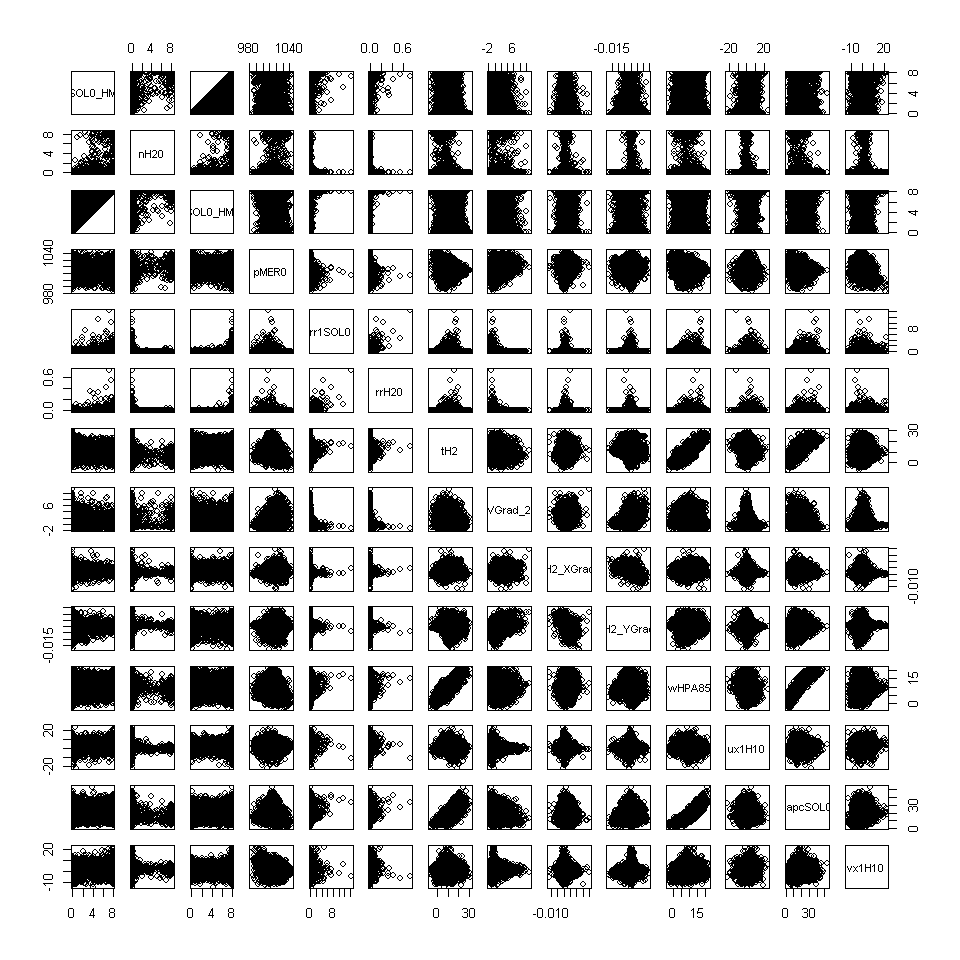

In [10]:
options(repr.plot.width=8, repr.plot.height=8)
pairs(meteo[,c(3:15)])
pairs(meteo[,c(16:29)])

## Données Manquantes

- 581 Na's in capeinsSOL0

In [11]:
# dans un premier temps, les supprimer
meteo=meteo[complete.cases(meteo),]
cat(6167-nrow(meteo),'rows have been deleted (',(6167-nrow(meteo))/6167*100,'%)');
summary(meteo)

840 rows have been deleted ( 13.62089 %)

         date          insee             tH2_obs       capeinsSOL0      
 2014-01-01:   7   Min.   : 6088001   Min.   :-6.10   Min.   :   0.000  
 2014-01-02:   7   1st Qu.:31069001   1st Qu.: 6.80   1st Qu.:   0.000  
 2014-01-03:   7   Median :35281001   Median :10.50   Median :   1.055  
 2014-01-04:   7   Mean   :43900001   Mean   :10.79   Mean   :  38.137  
 2014-01-05:   7   3rd Qu.:67124001   3rd Qu.:14.50   3rd Qu.:  20.416  
 2014-01-06:   7   Max.   :75114001   Max.   :29.80   Max.   :1083.809  
 (Other)   :5285                                                        
    ciwcH20             clwcH20           ddH10_rose4        ffH10         
 Min.   :0.000e+00   Min.   :0.000e+00   Min.   :1.000   Min.   : 0.00823  
 1st Qu.:0.000e+00   1st Qu.:0.000e+00   1st Qu.:2.000   1st Qu.: 1.74788  
 Median :0.000e+00   Median :0.000e+00   Median :3.000   Median : 2.61289  
 Mean   :6.145e-08   Mean   :5.446e-06   Mean   :2.749   Mean   : 3.04686  
 3rd Qu.:0.000e+00   3rd Qu.:0.000e+

## ACP

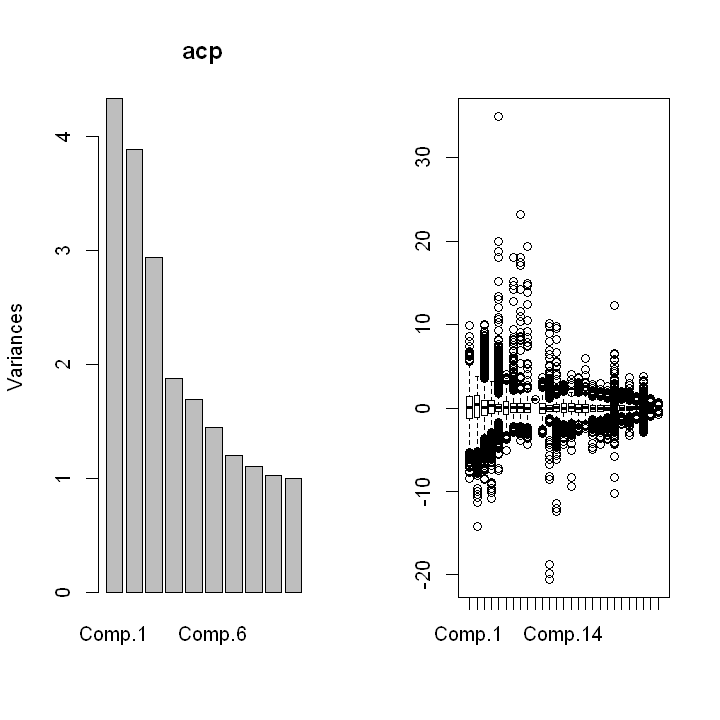

In [12]:
# ACP réduite
acp=princomp(meteo[,c(3:29)],cor=TRUE)
# Décroissance des valeurs propres
options(repr.plot.width=6, repr.plot.height=6)
par(mfrow = c(1,2))
plot(acp); boxplot(data.frame(acp$scores));

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
"zero-length arrow is of indeterminate angle and so skipped"

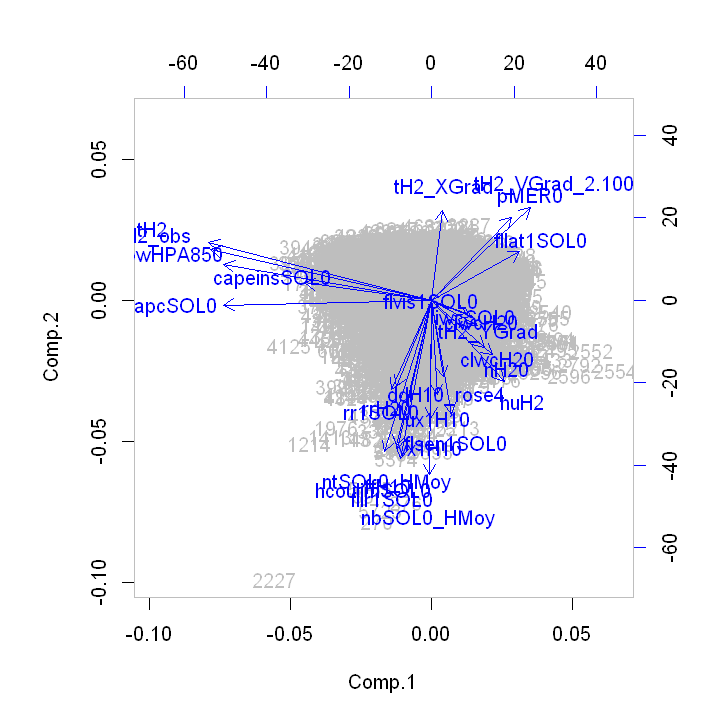

In [13]:
options(repr.plot.width=6, repr.plot.height=6)
biplot(acp, col=c("grey","blue"))

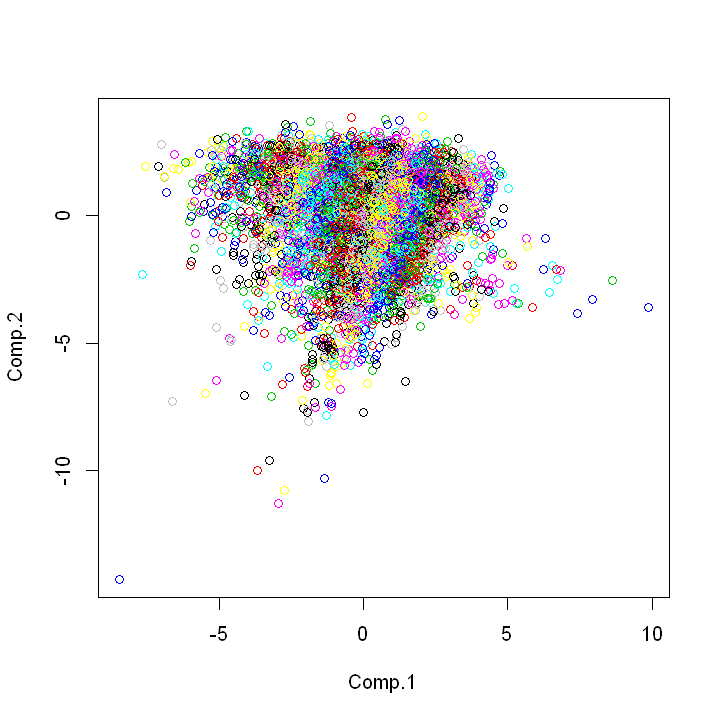

In [14]:
coul=as.integer(meteo[,"tH2_obs"])+6
plot(acp$scores,col=coul)

Assez brouillon mais on voit quand même des sortes de rayures de couleur!

### K-Means

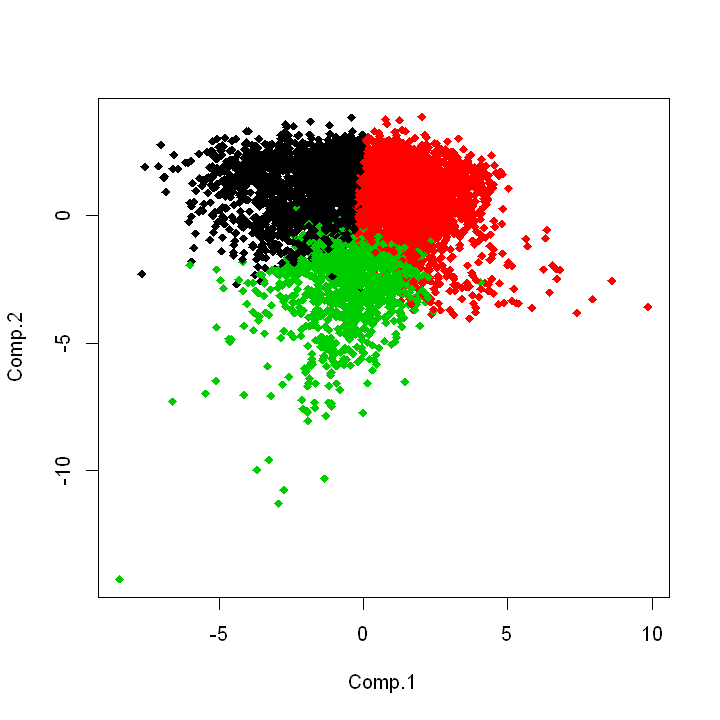

In [15]:
km.meteo=kmeans(scale(meteo[,c(3:29)]),centers=3)
# Représentatino dans les coordonnées de l'acp
coul=km.meteo$cluster
plot(acp$scores,col=coul, pch=18)

WOW :O

In [16]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio=.2   # part de l'échantillon test
npop=nrow(meteo) # nombre de lignes dans les données
nvar=ncol(meteo) # nombre de colonnes
# taille de l'échantillon test
ntest=ceiling(npop*test.ratio) 
# indices de l'échantillon test
testi=sample(1:npop,ntest)
# indices de l'échantillon d'apprentissage
appri=setdiff(1:npop,testi) 

In [17]:
# construction de l'échantillon d'apprentissage
datappr=meteo[appri,-2] 
# construction de l'échantillon test
datestr=meteo[testi,-2] 
summary(datappr) # vérification

         date         tH2_obs       capeinsSOL0          ciwcH20         
 2014-01-03:   7   Min.   :-4.60   Min.   :   0.000   Min.   :0.000e+00  
 2014-01-07:   7   1st Qu.: 6.70   1st Qu.:   0.000   1st Qu.:0.000e+00  
 2014-01-15:   7   Median :10.50   Median :   1.134   Median :0.000e+00  
 2014-01-17:   7   Mean   :10.76   Mean   :  36.911   Mean   :7.349e-08  
 2014-01-27:   7   3rd Qu.:14.50   3rd Qu.:  20.951   3rd Qu.:0.000e+00  
 2014-01-28:   7   Max.   :29.80   Max.   :1083.809   Max.   :4.306e-05  
 (Other)   :4219                                                         
    clwcH20           ddH10_rose4        ffH10            flir1SOL0      
 Min.   :0.000e+00   Min.   :1.000   Min.   : 0.07698   Min.   :-503864  
 1st Qu.:0.000e+00   1st Qu.:2.000   1st Qu.: 1.74078   1st Qu.:-253586  
 Median :0.000e+00   Median :3.000   Median : 2.59254   Median :-205086  
 Mean   :5.585e-06   Mean   :2.752   Mean   : 3.02199   Mean   :-187306  
 3rd Qu.:0.000e+00   3rd Qu.:4.000   3

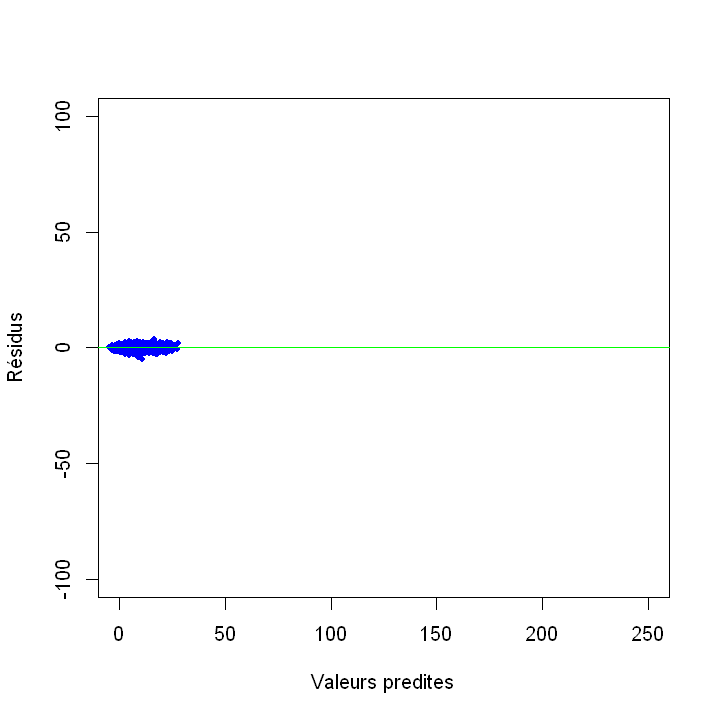

In [18]:
# estimation du modèle sans interaction
reg.lm=aov(tH2_obs~.,data=datappr)
# Extraction des résidus et des valeurs ajustées
# de ce modèle
res.lm=reg.lm$residuals
fit.lm=reg.lm$fitted.values
# graphe des résidus
# Définition d'une fonction pour un graphe coloré et 
# des échelles fixes sur les axes
plot.res=function(x,y,titre="titre")
{
plot(x,y,col="blue",xlim=c(0,250),ylim=c(-100,100),
ylab="Résidus",xlab="Valeurs predites",main=titre,pch=20)
# points(x2,y,col="red")
abline(h=0,col="green")
}
plot.res(fit.lm,res.lm,"")

In [19]:
summary(reg.lm)

                  Df Sum Sq Mean Sq   F value   Pr(>F)    
date             760 103378     136   190.654  < 2e-16 ***
capeinsSOL0        1   3109    3109  4357.215  < 2e-16 ***
ciwcH20            1    300     300   420.204  < 2e-16 ***
clwcH20            1    535     535   749.254  < 2e-16 ***
ddH10_rose4        1      1       1     1.002 0.316943    
ffH10              1   1138    1138  1594.958  < 2e-16 ***
flir1SOL0          1    131     131   183.349  < 2e-16 ***
fllat1SOL0         1   4403    4403  6170.743  < 2e-16 ***
flsen1SOL0         1     64      64    89.384  < 2e-16 ***
hcoulimSOL0        1    517     517   724.360  < 2e-16 ***
huH2               1   2224    2224  3117.439  < 2e-16 ***
iwcSOL0            1     16      16    22.037 2.78e-06 ***
nbSOL0_HMoy        1     54      54    75.153  < 2e-16 ***
nH20               1      1       1     0.981 0.322086    
ntSOL0_HMoy        1    123     123   172.670  < 2e-16 ***
pMER0              1    553     553   775.640  < 2e-16 *

### Modèle quadratique

In [ ]:
# Estimation du modèle de toute interaction d'ordre 2
reg.glm=glm(tH2_obs~(.)^2,data=datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante

reg.glm.step=step(reg.glm,direction="both")

In [ ]:
# Coefficients du modèle
anova(reg.glm.step,test="F")

In [ ]:
# Extraction des valeurs ajustées et des résidus
fit.glm=reg.glm.step$fitted.values
res.glm=reg.glm.step$residuals
# Graphe des résidus
plot.res(fit.glm,res.glm,"")

### Prévision de l'échantillon test

In [ ]:
# Calcul des prévisions
pred.glm=predict(reg.glm.step,newdata=datestr)
# Erreur quadratique moyenne de prévision (MSE)
sum((pred.glm-datestr[,"O3obs"])^2)/nrow(datestr)

## 5. [Prévision par modèle binomial](http://wikistat.fr/pdf/st-m-app-rlogit.pdf)


### 5.1 Régression logistique sans interaction

In [ ]:
# estimation du modèle complet
log.lm=glm(DepSeuil~.,data=datappq,family=binomial)
# significativité des paramètres
anova(log.lm,test="Chisq")